In [1]:
from prepocessing import DataProcessor
from Modello import model
from Training import training
from Testing import testing
from sklearn.model_selection import train_test_split

In [2]:
Procession=DataProcessor()
X, y=Procession.get_datas()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_test.shape[0]

6926

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
Model=model(num_k=[32,64], k_size=[3,3], p_size=[2,2], num_n=64)
Training=training(model=Model.model,X_train=X_train,y_train=y_train, val_data=(X_val,y_val), ep=5, b_size=32)

c:\Users\curci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4273 - loss: 1.9684 - val_accuracy: 0.8758 - val_loss: 0.3874
Epoch 2/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9336 - loss: 0.2369 - val_accuracy: 0.9652 - val_loss: 0.1135
Epoch 3/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9862 - loss: 0.0637 - val_accuracy: 0.9940 - val_loss: 0.0344
Epoch 4/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9970 - loss: 0.0218 - val_accuracy: 0.9998 - val_loss: 0.0071
Epoch 5/5
693/693 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9997 - loss: 0.0061 - val_accuracy: 0.9866 - val_loss: 0.0377


In [7]:
Testing=testing(X_test=X_test,y_test=y_test, model=Training.model)

217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9883 - loss: 0.0349


In [8]:
predicted_classes, true_classes = Testing.predictions(X_test=X_test, y_test=y_test)

217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


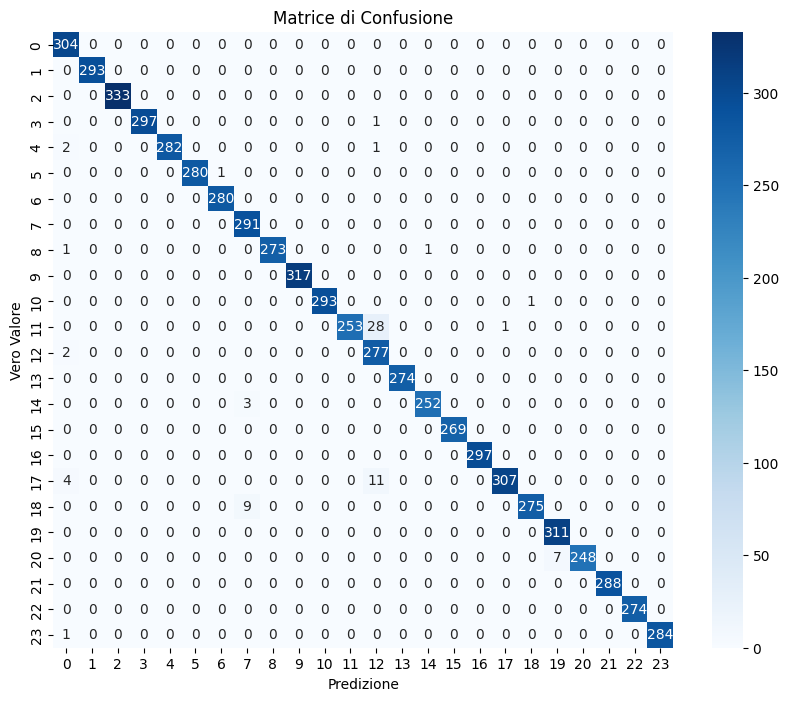

In [9]:
Testing.confusionmatrix(true_classes, predicted_classes)